Month -  1
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


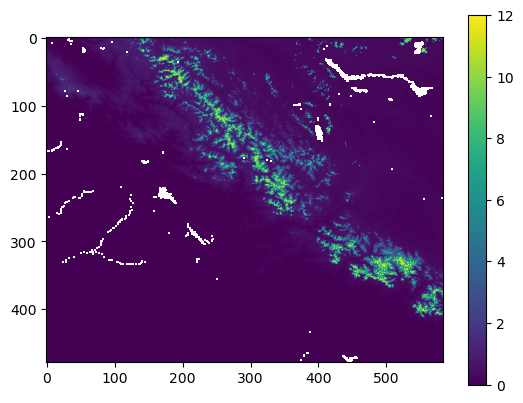

Month -  2
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


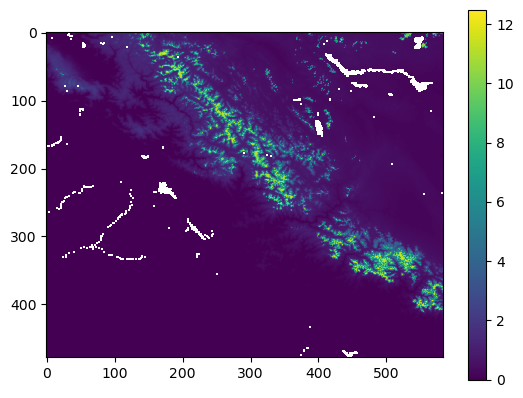

Month -  3
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


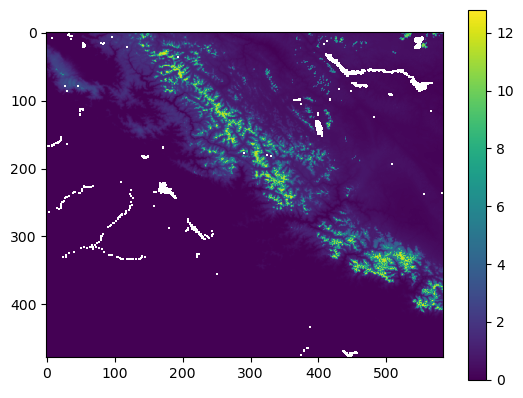

Month -  4
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


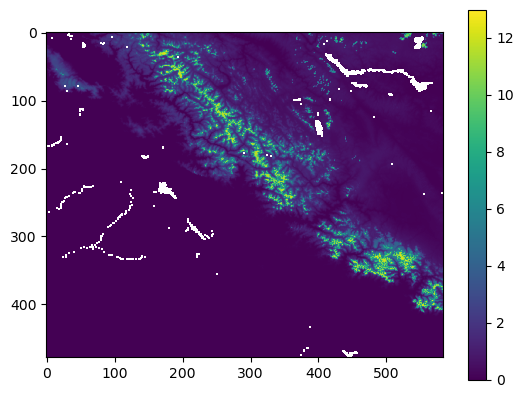

Month -  5
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


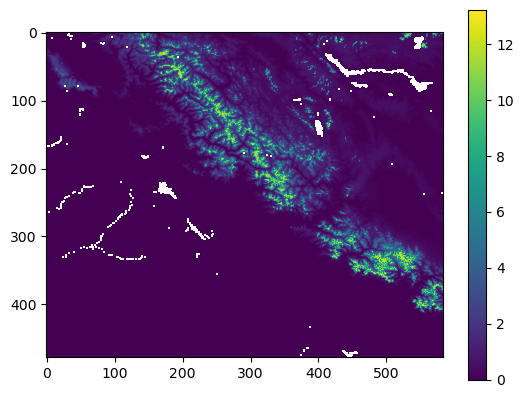

Month -  6
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


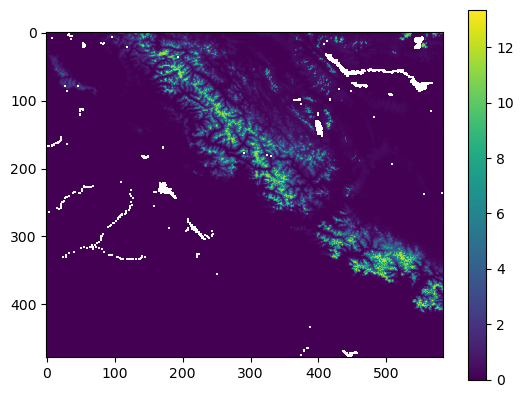

Month -  7
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


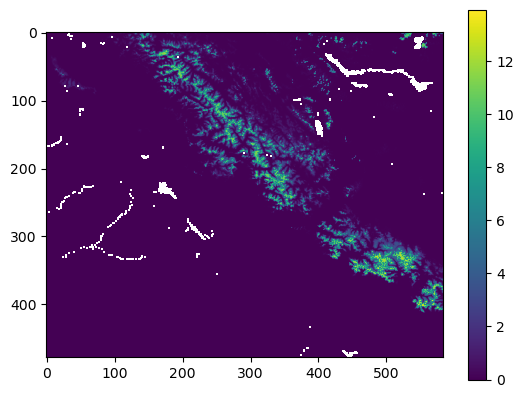

Month -  8
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


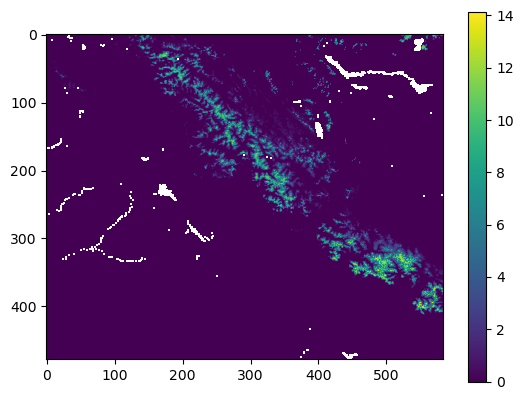

Month -  9
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


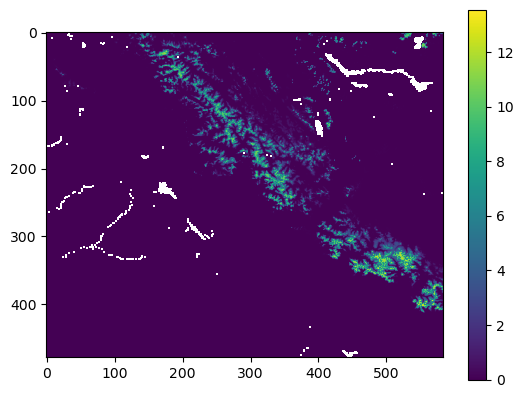

Month -  10
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


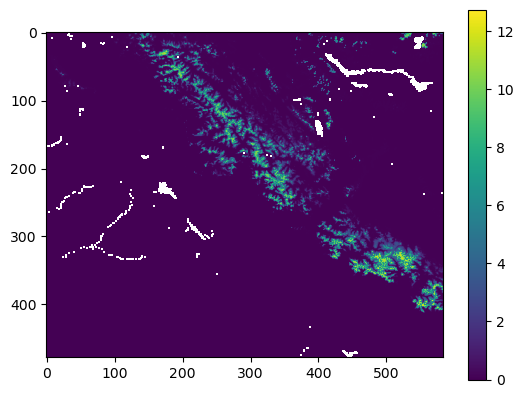

Month -  11
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


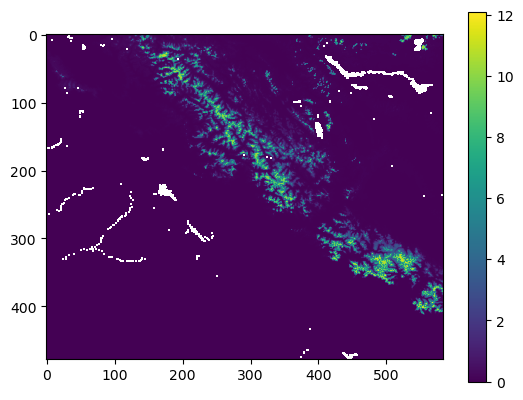

Month -  12
Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


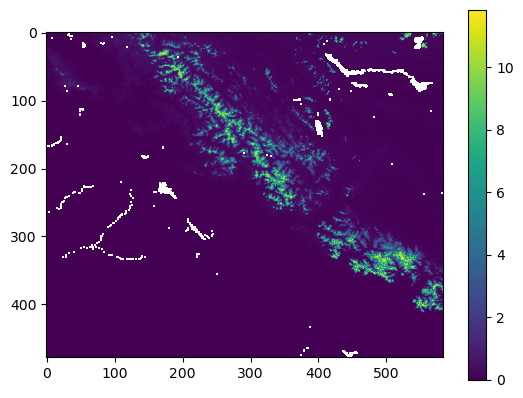

In [8]:
import glob
from osgeo import gdal
import numpy as np

from matplotlib import pyplot as plt

path = r"E:\Rachit\FLDAS_forcodetest\wgetdata\Snow_depth"

# files = glob.glob(path+"\*2000*.tif")

counter = 0

for month in range(1,13):

    yearly_sum_of_monthly_means = []

    for year in range(2001,2024):    

        if month<10:
            daily_month_wise_file_list = glob.glob(path+"\*"+"A"+str(year)+str(0)+str(month)+"*.tif")
        else:
            daily_month_wise_file_list = glob.glob(path+"\*"+"A"+str(year)+str(month)+"*.tif")


        if daily_month_wise_file_list == []:            
            continue

        monthly_sum = []

        for file in daily_month_wise_file_list:                            
            data = gdal.Open(file)
            arr = data.ReadAsArray()
            arr[arr == -9999] = np.nan  # Replace with the actual NoData value                
            monthly_sum.append(arr)
            # print(np.min(arr))
            # print(np.max(arr))
        
# =============================================================================
#         monthly_sum_array = np.array(monthly_sum)
#         monthly_mean = np.mean(monthly_sum_array,axis=0)
#         
#         plt.imshow(monthly_mean)
#         plt.show()
#         counter=counter+1
#         print(counter)
#         print("Month",month)
#         print("Year",year)
# =============================================================================


        monthly_sum_array = np.array(monthly_sum)
        monthly_mean = np.mean(monthly_sum_array,axis=0)
        yearly_sum_of_monthly_means.append(monthly_mean)
        monthly_mean = None
   
    if yearly_sum_of_monthly_means == []:
        continue
   
    yearly_sum_of_monthly_means_array = np.array(yearly_sum_of_monthly_means)
    yearly_mean_of_monthly_means = np.mean(yearly_sum_of_monthly_means_array,axis=0)      
    # yearly_mean_of_monthly_means = np.where(yearly_mean_of_monthly_means<0,
    #                                         0,
    #                                         yearly_mean_of_monthly_means)

    print("Month - ",month)
    print("Max - ",np.max(yearly_mean_of_monthly_means))
    print("Min - ",np.min(yearly_mean_of_monthly_means))
    print("maxlocation - ",np.where(yearly_mean_of_monthly_means == np.max(yearly_mean_of_monthly_means)))
    plt.imshow(yearly_mean_of_monthly_means)
    plt.colorbar()
    plt.show()

    ########## Saving as tiff file
    dst_filename=(f"E:\\Rachit\\FLDAS_forcodetest\\output\\Snow_depth\\snowdepth_{month}.tif")
    driver = gdal.GetDriverByName("GTiff")
    # Specify the dimensions of the image
    rows, cols = yearly_mean_of_monthly_means.shape
    # Create the output raster dataset
    dst_dataset = driver.Create(dst_filename, cols, rows, bands=1, eType = gdal.GDT_Float64)

    # Set required metadata and georeferencing information
    from osgeo import osr
    crs = osr.SpatialReference()
    crs.ImportFromEPSG(4326)   #  EPSG code for WGS84
    crs.ExportToWkt()
    transform =data.GetGeoTransform()  #  Identity transform

    dst_dataset.SetProjection(crs.ExportToWkt())
    dst_dataset.SetGeoTransform(transform)

    # Write the array data to the raster band
    band = dst_dataset.GetRasterBand(1)
    band.WriteArray(yearly_mean_of_monthly_means)
    #close the dataset to save changes
    dst_dataset.FlushCache()
    dst_dataset=None
    
    
# =============================================================================
#     Check the code, if the values are correct then write the "yearly_mean_of_monthly_means"
#     array to tif file using gdal
# =============================================================================

# Clip

In [9]:
def ClipAll(infol,shpin,outfol):
    
    """Parameters are infol = path to input folder, shpin = path to input shape file, outfol = path to folder for clipped rasters

    Usage Example :-
    
    ClipAll(infol = r"D:\\Landsat\\Study Area", shpin = r"D:\\Study Area\\Study.shp", outfol = r"D:\\Study Area\\Clipped Output")
    
    use help(ClipAll) for clearer details
    
    """
    
    from osgeo import gdal
    import glob
    import datetime
    from tqdm import tqdm
    
    start_time = datetime.datetime.now()
    infiles = glob.glob(infol + "\*.tif") 
    
    for i in tqdm(range(len(infiles))):
        split = infiles[i].split("\\")
        outfilename = split[-1][:-4]
        dsclip=gdal.Warp(destNameOrDestDS = outfol + '\\' + outfilename + '_clip' + '.tif',
                         srcDSOrSrcDSTab = infiles[i],
                         cutlineDSName=shpin,
                         cropToCutline=True,
                         dstNodata = np.nan)
        dsclip = None
        
    end_time = datetime.datetime.now()
    
    time_taken = end_time - start_time
    
    output = str(len(infiles))+" Files Successfully Clipped !!" + "\nTime Taken was " + str(time_taken)
    
    return(output)
names=['Asan','Aglar','Gangotri','Hanval','Jhelum','Parbati','Suketi','Tawi','Beas_Manali']
for name in names:
    result = ClipAll(r'E:\\Rachit\\FLDAS_forcodetest\\output\\Snow_depth',r"E:\\Rachit\\NWH\\shapefiles_watershed\\"+name+".shp",r"E:\\Rachit\\FLDAS_forcodetest\\output\\Snow_depth\\"+name)

100%|██████████| 12/12 [00:00<00:00, 118.11it/s]


# Snow depth Long Term Annual Average

Max -  nan
Min -  nan
maxlocation -  (array([], dtype=int64), array([], dtype=int64))


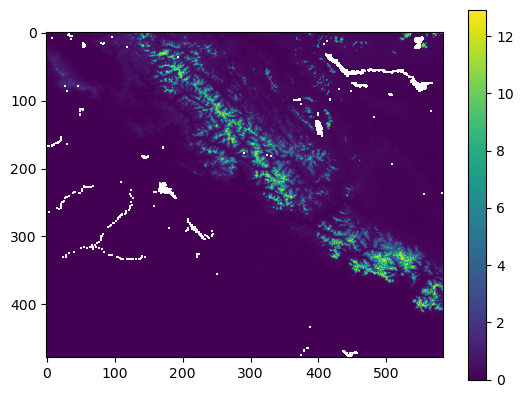

In [14]:
import glob
from osgeo import gdal
import numpy as np

from matplotlib import pyplot as plt

path = r"E:\\Rachit\\FLDAS_forcodetest\\wgetdata\\Snow_depth"

counter = 0

yearly_sum_of_yearly_sum = []

for year in range(2001,2024):    

    
    daily_file_list = glob.glob(path+"\*"+"A"+str(year)+"*.tif")


    if daily_file_list == []:            
        continue

    yearly_files = []

    for file in daily_file_list:                            
        data = gdal.Open(file)
        arr = data.ReadAsArray()
        arr[arr == -9999] = np.nan  # Replace with the actual NoData value                
        yearly_files.append(arr)
        # print(np.min(arr))
        # print(np.max(arr))
    
# =============================================================================
#         monthly_sum_array = np.array(monthly_sum)
#         monthly_mean = np.mean(monthly_sum_array,axis=0)
#         
#         plt.imshow(monthly_mean)
#         plt.show()
#         counter=counter+1
#         print(counter)
#         print("Month",month)
#         print("Year",year)
# =============================================================================


    yearly_sum_array = np.array(yearly_files)
    yearly_sum = np.mean(yearly_sum_array,axis=0)
    yearly_sum_of_yearly_sum.append(yearly_sum)
    yearly_sum = None

    if yearly_sum_of_yearly_sum == []:
        continue

yearly_sum_of_yearly_sum_array = np.array(yearly_sum_of_yearly_sum)
yearly_mean_of_yearly_sum = np.mean(yearly_sum_of_yearly_sum_array,axis=0) 
# yearly_mean_of_yearly_means = np.where(yearly_mean_of_yearly_means<0,
#                                         0,
#                                         yearly_mean_of_yearly_means)

print("Max - ",np.max(yearly_mean_of_yearly_sum))
print("Min - ",np.min(yearly_mean_of_yearly_sum))
print("maxlocation - ",np.where(yearly_mean_of_yearly_sum == np.max(yearly_mean_of_yearly_sum)))
plt.imshow(yearly_mean_of_yearly_sum)
plt.colorbar()
plt.show()

########## Saving as tiff file
dst_filename=(f"E:\\Rachit\\FLDAS_forcodetest\\output\\Snow_depth\\Snow_depth_yearly_mean.tif")
driver = gdal.GetDriverByName("GTiff")
# Specify the dimensions of the image
rows, cols = yearly_mean_of_yearly_sum.shape
# Create the output raster dataset
dst_dataset = driver.Create(dst_filename, cols, rows, bands=1, eType = gdal.GDT_Float64)

# Set required metadata and georeferencing information
from osgeo import osr
crs = osr.SpatialReference()
crs.ImportFromEPSG(4326)   #  EPSG code for WGS84
crs.ExportToWkt()
transform =data.GetGeoTransform()  #  Identity transform

dst_dataset.SetProjection(crs.ExportToWkt())
dst_dataset.SetGeoTransform(transform)

# Write the array data to the raster band
band = dst_dataset.GetRasterBand(1)
band.WriteArray(yearly_mean_of_yearly_sum)
#close the dataset to save changes
dst_dataset.FlushCache()
dst_dataset=None

In [15]:
# Clipping Snow depth annual avg
def ClipAll(infol,shpin,outfol):
    
    """Parameters are infol = path to input folder, shpin = path to input shape file, outfol = path to folder for clipped rasters

    Usage Example :-
    
    ClipAll(infol = r"D:\\Landsat\\Study Area", shpin = r"D:\\Study Area\\Study.shp", outfol = r"D:\\Study Area\\Clipped Output")
    
    use help(ClipAll) for clearer details
    
    """
    
    from osgeo import gdal
    import glob
    import datetime
    from tqdm import tqdm
    
    start_time = datetime.datetime.now()
    infiles = glob.glob(infol + "\*_yearly_mean.tif") 
    
    for i in tqdm(range(len(infiles))):
        split = infiles[i].split("\\")
        outfilename = split[-1][:-4]
        dsclip=gdal.Warp(destNameOrDestDS = outfol + '\\' + outfilename + '_clip' + '.tif',
                         srcDSOrSrcDSTab = infiles[i],
                         cutlineDSName=shpin,
                         cropToCutline=True,
                         dstNodata= np.nan)  #dstNodata to define no data value
        dsclip = None
        
    end_time = datetime.datetime.now()
    
    time_taken = end_time - start_time
    
    output = str(len(infiles))+" Files Successfully Clipped !!" + "\nTime Taken was " + str(time_taken)
    
    return(output)
names=['Asan','Aglar','Gangotri','Hanval','Jhelum','Parbati','Suketi','Tawi','Beas_Manali'] #
for name in names:
    result = ClipAll(r'E:\\Rachit\\FLDAS_forcodetest\\output\\Snow_depth',r"E:\\Rachit\\NWH\\shapefiles_watershed\\"+name+".shp",r"E:\Rachit\FLDAS_forcodetest\output\Snow_depth\\"+name)
    print(result)

100%|██████████| 1/1 [00:00<00:00, 31.27it/s]


1 Files Successfully Clipped !!
Time Taken was 0:00:00.034977


100%|██████████| 1/1 [00:00<00:00, 33.06it/s]


1 Files Successfully Clipped !!
Time Taken was 0:00:00.033260


100%|██████████| 1/1 [00:00<00:00, 104.26it/s]


1 Files Successfully Clipped !!
Time Taken was 0:00:00.012123


100%|██████████| 1/1 [00:00<00:00, 71.86it/s]


1 Files Successfully Clipped !!
Time Taken was 0:00:00.017914


100%|██████████| 1/1 [00:00<00:00, 62.46it/s]


1 Files Successfully Clipped !!
Time Taken was 0:00:00.018986


100%|██████████| 1/1 [00:00<00:00, 76.90it/s]


1 Files Successfully Clipped !!
Time Taken was 0:00:00.015979


100%|██████████| 1/1 [00:00<00:00, 90.97it/s]


1 Files Successfully Clipped !!
Time Taken was 0:00:00.012993


100%|██████████| 1/1 [00:00<00:00, 76.91it/s]


1 Files Successfully Clipped !!
Time Taken was 0:00:00.015990


100%|██████████| 1/1 [00:00<00:00, 100.06it/s]

1 Files Successfully Clipped !!
Time Taken was 0:00:00.012994
